In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
sd = pd.read_csv('data_download.csv')
sd.columns
sd.isnull().sum()

# cleaning columns
sdnew = sd.drop('symbol',axis="columns")
sdnew = sdnew.drop('exchange',axis="columns")
sdnew = sdnew.drop('option symbol',axis="columns")
sdnew = sdnew.drop('rho',axis="columns")
sdnew = sdnew.drop('theta',axis="columns")
sdnew = sdnew.drop('gamma',axis="columns")
sdnew = sdnew.drop('vega',axis="columns")
sdnew = sdnew.drop('*',axis="columns")
sdnew = sdnew.drop('expiration',axis="columns")
sdnew.columns
sdnew.head()

df = sdnew

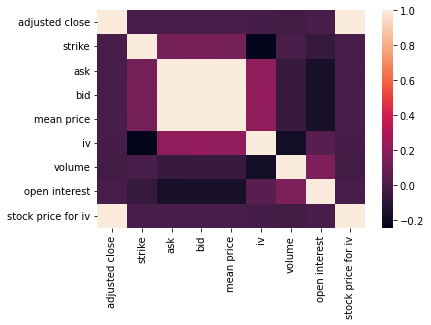

In [34]:
sns.heatmap(df.corr());

In [32]:
df.head()

,date,adjusted close,expiration,strike,call/put,style,ask,bid,mean price,iv,volume,open interest,stock price for iv
0,01/18/2023,391.49,01/18/2023,320.0,C,A,72.02,70.82,71.42,-1.0,3,3,391.45
1,01/18/2023,391.49,01/18/2023,320.0,P,A,0.01,0.00,0.00,-1.0,2,239,391.45
2,01/18/2023,391.49,01/18/2023,323.0,C,A,69.02,67.82,68.42,-1.0,1,0,391.45
3,01/18/2023,391.49,01/18/2023,323.0,P,A,0.01,0.00,0.00,-1.0,0,240,391.45
4,01/18/2023,391.49,01/18/2023,324.0,C,A,68.02,66.82,67.42,-1.0,1,0,391.45


In [71]:

# trying new model
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

train.head()

x_train = train[['delta','strike','bid']]

y_train = train['iv']

x_test = test[['delta','strike','bid']]
y_test = test['iv']

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [63]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.1916906914733098
RMSE value for k=  2 is: 0.16315321701555432
RMSE value for k=  3 is: 0.15214025022229313
RMSE value for k=  4 is: 0.15030021770124685
RMSE value for k=  5 is: 0.14754339498659
RMSE value for k=  6 is: 0.14553770474283978
RMSE value for k=  7 is: 0.14445830278325925
RMSE value for k=  8 is: 0.1433895804542243
RMSE value for k=  9 is: 0.14234383490439334
RMSE value for k=  10 is: 0.14203194479273792
RMSE value for k=  11 is: 0.14287429909787636
RMSE value for k=  12 is: 0.1439256430315728
RMSE value for k=  13 is: 0.14312922357679575
RMSE value for k=  14 is: 0.14296032408345286
RMSE value for k=  15 is: 0.14277058023827768
RMSE value for k=  16 is: 0.14324476749848167
RMSE value for k=  17 is: 0.1436014460589363
RMSE value for k=  18 is: 0.14358541817780945
RMSE value for k=  19 is: 0.14382253018110375
RMSE value for k=  20 is: 0.14446283152122114


<AxesSubplot:>

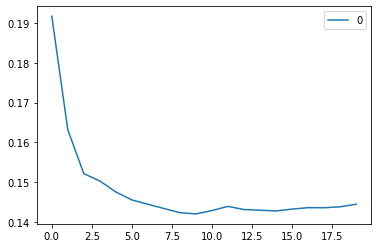

In [74]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [75]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 9}